# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

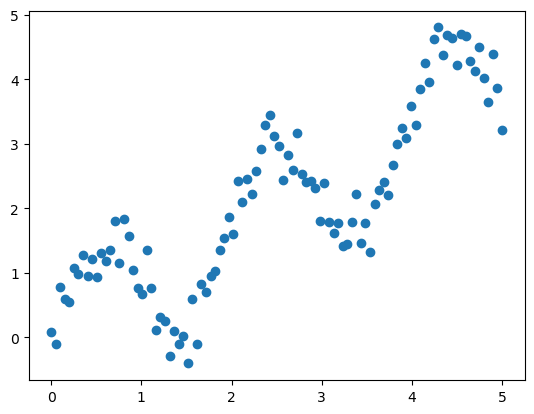

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6060306542510944


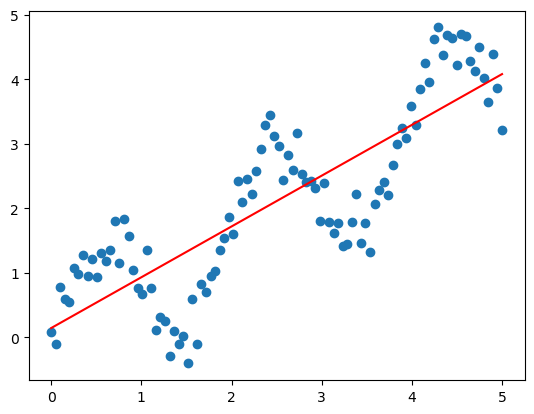

In [7]:
predict_Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,predict_Y , color='r')
mse = np.sum((predict_Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [54]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 6)


In [55]:
regr_poly = LinearRegression()

In [56]:
regr_poly.fit(X_poly, y)

LinearRegression()

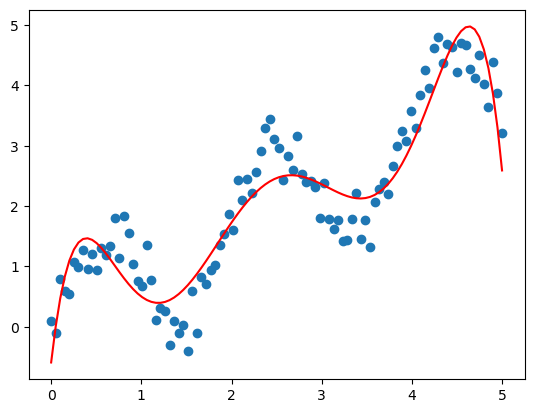

In [57]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [58]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 13.13141486 -28.0377833   23.58132878  -9.10818809   1.6369289
  -0.1108468 ]
interception:  -0.5917301191263191


In [59]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([-5.91730119e-01,  2.93416141e-03,  4.71976855e-01,  8.31571614e-01,
        1.09659605e+00,  1.28069295e+00,  1.39633024e+00,  1.45485950e+00,
        1.46657330e+00,  1.44076108e+00,  1.38576380e+00,  1.30902722e+00,
        1.21715386e+00,  1.11595365e+00,  1.01049325e+00,  9.05143997e-01,
        8.03628650e-01,  7.09066670e-01,  6.24018261e-01,  5.50527063e-01,
        4.90161515e-01,  4.44054908e-01,  4.12944097e-01,  3.97206900e-01,
        3.96898169e-01,  4.11784535e-01,  4.41377830e-01,  4.84967183e-01,
        5.41649797e-01,  6.10360391e-01,  6.89899328e-01,  7.78959411e-01,
        8.76151362e-01,  9.80027966e-01,  1.08910690e+00,  1.20189223e+00,
        1.31689461e+00,  1.43265007e+00,  1.54773764e+00,  1.66079547e+00,
        1.77053574e+00,  1.87575821e+00,  1.97536247e+00,  2.06835881e+00,
        2.15387781e+00,  2.23117861e+00,  2.29965584e+00,  2.35884521e+00,
        2.40842779e+00,  2.44823299e+00,  2.47824018e+00,  2.49857900e+00,
        2.50952833e+00,  

In [60]:
predict_Y = regr_poly.predict(X_poly)

MSE = np.sum((predict_Y-y)**2) / len(y)
print('MSE = ', MSE)

MSE =  0.23782740158173454


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [61]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [62]:
sigma = 0.3

In [63]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [64]:
regr_rbf = LinearRegression()

In [65]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

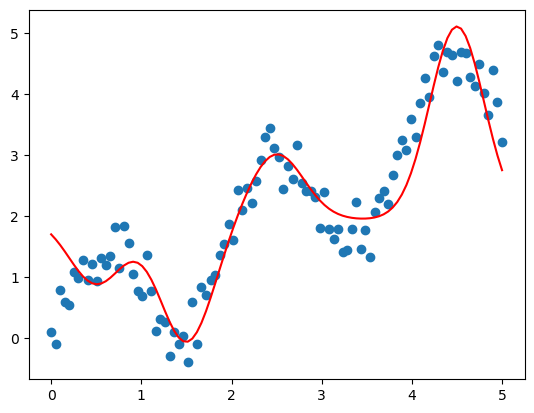

In [66]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [67]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.08025086 -2.03472715  1.05175247 -0.02548485  3.142675  ]
interception:  1.9657142361521072


#### Comparison

In [68]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

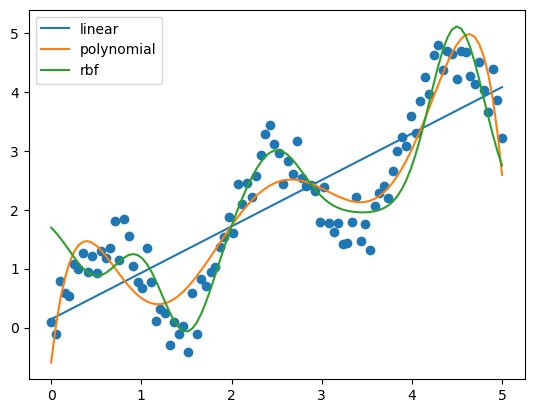

In [69]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [70]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6060306542510944


In [71]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.23782740158173454


In [72]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2375654768130075
